# Problem 1

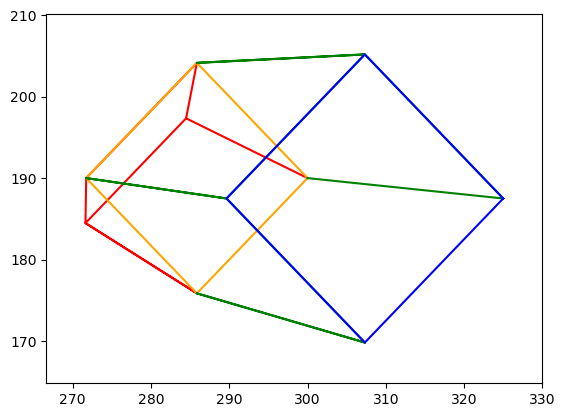

In [12]:
import numpy as np
from math import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

c_R_w = np.array([[1/sqrt(2), 1/sqrt(2), 0],
                  [-1/sqrt(2), 1/sqrt(2), 0],
                  [0, 0, 1]])  # rotation matrix

c_t_w = np.array([[-5], [0.5], [4]])  # translation matrix

c_T_w = np.hstack((c_R_w, c_t_w))  # Transformation Matrix

K = np.array([[-100, 0, 200],  # prespective projection and scale & shift matrix
              [0, -100, 200],
              [0, 0, 1]])

houseRoof_3DPoints = np.array([[0,0,1],
                                [1/2,0,3/2],
                                [1,0,1],
                                [1,1,1],
                                [1/2,1,3/2],
                                [0,1,1],
                                [1/2,1,3/2],
                                [1/2,0,3/2]]) # Roof poitns of the house

houseRoofBase_3DPoints = np.array([[0,0,1],
                                   [1,0,1],
                                   [1,1,1],
                                   [0,1,1],
                                   [0,0,1]]) # Roof base poitns of the house

housePillar_3DPoints = np.array([[0,0,1],
                                 [0,0,0],
                                 [1,0,0],
                                 [1,0,1],
                                 [1,0,0],
                                 [1,1,0],
                                 [1,1,1],
                                 [1,1,0],
                                 [0,1,0],
                                 [0,1,1],
                                 [0,1,0]]) # Pillar points of the house

houseBase_3DPoints = np.array([[0,0,0],
                               [1,0,0],
                               [1,1,0],
                               [0,1,0],
                               [0,0,0]]) # base/foundation poitns of the house

# get 2D points for House
houseBase_2DPoints = np.zeros((len(houseBase_3DPoints),2))
housePillar_2DPoints = np.zeros((len(housePillar_3DPoints),2))
houseRoofBase_2DPoints = np.zeros((len(houseRoofBase_3DPoints),2))
houseRoof_2DPoints = np.zeros((len(houseRoof_3DPoints),2))

homogeneous_2DPoints = []

for i in range(len(houseBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseBase_3DPoints[i],[1]))))
    houseBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]

for i in range(len(housePillar_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((housePillar_3DPoints[i],[1]))))
    housePillar_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    housePillar_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]
    
for i in range(len(houseRoofBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoofBase_3DPoints[i],[1]))))
    houseRoofBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoofBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]    

for i in range(len(houseRoof_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoof_3DPoints[i],[1]))))
    houseRoof_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoof_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]  

houseRoof_2DPoints = houseRoof_2DPoints.T
houseRoofBase_2DPoints = houseRoofBase_2DPoints.T
housePillar_2DPoints = housePillar_2DPoints.T
houseBase_2DPoints = houseBase_2DPoints.T

x_Roof = houseRoof_2DPoints[0]
y_Roof = houseRoof_2DPoints[1]

x_RoofBase = houseRoofBase_2DPoints[0]
y_RoofBase = houseRoofBase_2DPoints[1]


x_Pillar = housePillar_2DPoints[0]
y_Pillar = housePillar_2DPoints[1]

x_Base = houseBase_2DPoints[0]
y_Base = houseBase_2DPoints[1]

x = np.hstack((x_Roof,x_RoofBase,x_Pillar,x_Base))
y = np.hstack((y_Roof,y_RoofBase,y_Pillar,y_Base))

# Plot 2D House using Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
lineRoof = lines.Line2D(x_Roof, y_Roof, color='red')  # roof
lineRoofBase = lines.Line2D(x_RoofBase, y_RoofBase,
                            color='orange')  # roof base
linePillar = lines.Line2D(x_Pillar, y_Pillar, color='green')  # pillars
lineBase = lines.Line2D(x_Base, y_Base, color='blue')  # Base
ax.add_line(lineRoof)
ax.add_line(lineRoofBase)
ax.add_line(linePillar)
ax.add_line(lineBase)
ax.set_xlim(min(x)-5, max(x)+5)
ax.set_ylim(min(y)-5, max(y)+5)
plt.show()


# Problem 3

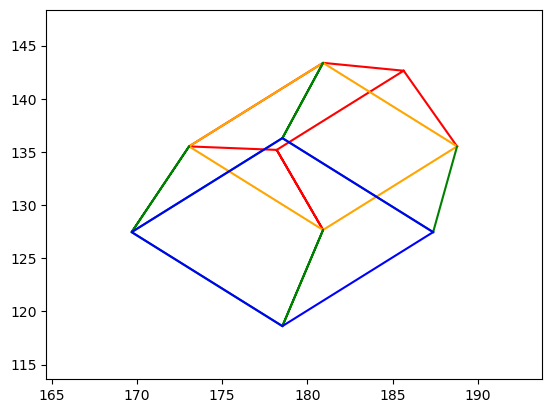

In [13]:
import numpy as np
from math import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as lines

c_R_w = np.array([[1/sqrt(2), 1/sqrt(2), 0],
                  [-1/sqrt(2), 1/sqrt(2), 0],
                  [0, 0, 1]])  # rotation matrix

c_t_w = np.array([[-5], [0.5], [4]])  # translation matrix

c_T_w = np.hstack((c_R_w, c_t_w))  # Transformation Matrix

# target Point
w_P = np.array([[1/2],[8],[4]]) # chnage x y z to look at diffrent views of house

c_P = np.matmul(c_T_w,np.vstack((w_P,[1])))

c_t_w = c_P

c_T_w = np.hstack((c_R_w,c_t_w))


K = np.array([[-100, 0, 200],  # prespective projection and scale & shift matrix
              [0, -100, 200],
              [0, 0, 1]])

houseRoof_3DPoints = np.array([[0,0,1],
                                [1/2,0,3/2],
                                [1,0,1],
                                [1,1,1],
                                [1/2,1,3/2],
                                [0,1,1],
                                [1/2,1,3/2],
                                [1/2,0,3/2]]) # Roof poitns of the house

houseRoofBase_3DPoints = np.array([[0,0,1],
                                   [1,0,1],
                                   [1,1,1],
                                   [0,1,1],
                                   [0,0,1]]) # Roof base poitns of the house

housePillar_3DPoints = np.array([[0,0,1],
                                 [0,0,0],
                                 [1,0,0],
                                 [1,0,1],
                                 [1,0,0],
                                 [1,1,0],
                                 [1,1,1],
                                 [1,1,0],
                                 [0,1,0],
                                 [0,1,1],
                                 [0,1,0]]) # Pillar points of the house

houseBase_3DPoints = np.array([[0,0,0],
                               [1,0,0],
                               [1,1,0],
                               [0,1,0],
                               [0,0,0]]) # base/foundation poitns of the house

# get 2D points for House
houseBase_2DPoints = np.zeros((len(houseBase_3DPoints),2))
housePillar_2DPoints = np.zeros((len(housePillar_3DPoints),2))
houseRoofBase_2DPoints = np.zeros((len(houseRoofBase_3DPoints),2))
houseRoof_2DPoints = np.zeros((len(houseRoof_3DPoints),2))

homogeneous_2DPoints = []

for i in range(len(houseBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseBase_3DPoints[i],[1]))))
    houseBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]

for i in range(len(housePillar_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((housePillar_3DPoints[i],[1]))))
    housePillar_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    housePillar_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]
    
for i in range(len(houseRoofBase_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoofBase_3DPoints[i],[1]))))
    houseRoofBase_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoofBase_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]    

for i in range(len(houseRoof_3DPoints)):
    homogenouse_2DPoints = np.matmul(K,np.matmul(c_T_w,np.hstack((houseRoof_3DPoints[i],[1]))))
    houseRoof_2DPoints[i,0] = homogenouse_2DPoints[0]/homogenouse_2DPoints[2]
    houseRoof_2DPoints[i,1] = homogenouse_2DPoints[1]/homogenouse_2DPoints[2]  

houseRoof_2DPoints = houseRoof_2DPoints.T
houseRoofBase_2DPoints = houseRoofBase_2DPoints.T
housePillar_2DPoints = housePillar_2DPoints.T
houseBase_2DPoints = houseBase_2DPoints.T

x_Roof = houseRoof_2DPoints[0]
y_Roof = houseRoof_2DPoints[1]

x_RoofBase = houseRoofBase_2DPoints[0]
y_RoofBase = houseRoofBase_2DPoints[1]


x_Pillar = housePillar_2DPoints[0]
y_Pillar = housePillar_2DPoints[1]

x_Base = houseBase_2DPoints[0]
y_Base = houseBase_2DPoints[1]

x = np.hstack((x_Roof,x_RoofBase,x_Pillar,x_Base))
y = np.hstack((y_Roof,y_RoofBase,y_Pillar,y_Base))

# Plot 2D House using Line2D
fig = plt.figure()
ax = fig.add_subplot(111)
lineRoof = lines.Line2D(x_Roof, y_Roof, color='red')  # roof
lineRoofBase = lines.Line2D(x_RoofBase, y_RoofBase,
                            color='orange')  # roof base
linePillar = lines.Line2D(x_Pillar, y_Pillar, color='green')  # pillars
lineBase = lines.Line2D(x_Base, y_Base, color='blue')  # Base
ax.add_line(lineRoof)
ax.add_line(lineRoofBase)
ax.add_line(linePillar)
ax.add_line(lineBase)
ax.set_xlim(min(x)-5, max(x)+5)
ax.set_ylim(min(y)-5, max(y)+5)
plt.show()

# Problem 7

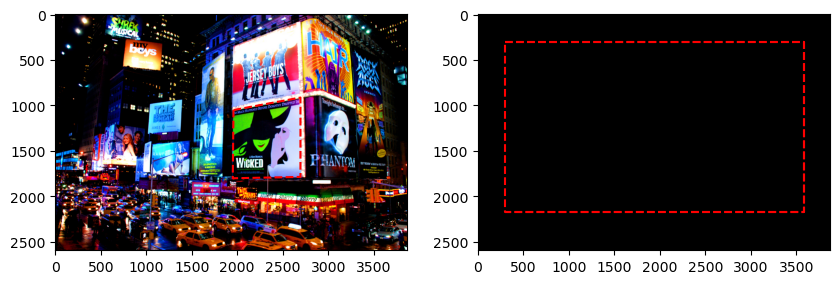

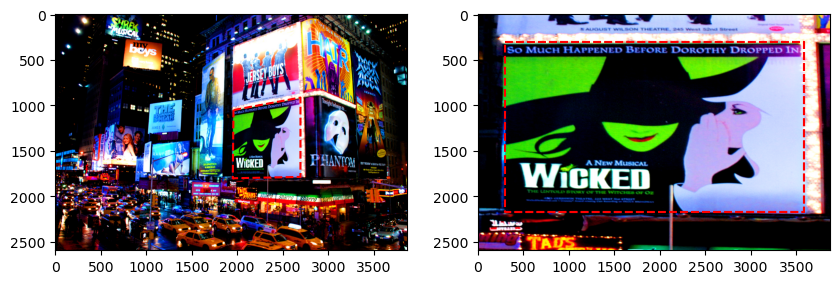

In [14]:
import numpy as np
from numpy.linalg import inv

from PIL import Image

from skimage.transform import warp
from skimage import transform

import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import ginput
from matplotlib.backend_bases import MouseButton

img = np.asarray(Image.open('newyork3.jpg'))
pts_src = np.array([[1959, 1050],
                    [2695, 913],
                    [2695, 1785],
                    [1951, 1800]])


# I am using a diffrent picture than the one provided. The pic can be downloaded using the following link 
# http://vision.gel.ulaval.ca/~jflalonde/cours/4105/h15/tps/results/tp4/SASOJ/Images/newyork3.jpg

img = np.asarray(Image.open('newyork3.jpg'))

# Use The below line to choose custom points for source poitns by removing the '#' on line 29 and 30
# When picking custom points pick in following oredr
#    Top left
#    Top Right
#    Bottom Right
#    Bottom Left
#plt.imshow(img,cmap='gray')
#pts_src = plt.ginput(4, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)

pts_src = np.round_(pts_src)

pts_dst = np.array([[300,300],
                    [3588,300],
                    [3588,2174],
                    [300,2174]])

projection = np.zeros_like(img)

# Use The below line to choose custom points for destination of poitns by removing the '#' on line 53 and 54
# When picking custom points pick in following oredr
#    Top left
#    Top Right
#    Bottom Right
#    Bottom Left
#plt.imshow(img,cmap='gray')
#pts_dst = plt.ginput(4, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)

pts_dst = np.round_(pts_dst)

%matplotlib inline
fig, ax = plt.subplots(1,2,figsize=(10,5))   
ax[0].imshow(img)
ax[0].plot(np.append(pts_src[:, 0], pts_src[0, 0]), np.append(pts_src[:, 1], pts_src[0, 1]), 'r--')
ax[1].imshow(projection)
ax[1].plot(pts_dst[:,0], pts_dst[:,1], 'r--')
ax[1].plot(np.append(pts_dst[:, 0], pts_dst[0, 0]), np.append(pts_dst[:, 1], pts_dst[0, 1]), 'r--')
plt.show()

def find_H(pts_src, pts_dst):
    A = find_A(pts_src, pts_dst)
    U,sigma,V = np.linalg.svd(A)
    homography = V.T[:,len(V[0])-1].reshape(3,3)
    return homography
    
def find_A(pts_src, pts_dst):
    num_points = pts_src.shape[0]

    A = []
    
    for i in range(num_points):
        rowOfPairPoints = find_rowOfPairPoints(pts_src[i], pts_dst[i])
        A.append(rowOfPairPoints)
    return np.concatenate(A, axis=0)

def find_rowOfPairPoints(pts_src, pts_dst):
    x, y = pts_src[0], pts_src[1]
    x_t, y_t = pts_dst[0], pts_dst[1]

    A_partial = np.array([
        [-x,-y,-1,0,0,0,x_t*x,x_t*y,x_t],
        [0,0,0,-x,-y,-1,y_t*x,y_t*y,y_t]
    ])
    return A_partial

H = find_H(pts_src,pts_dst)

%matplotlib inline
# The below was to check my results 
#tform = transform.estimate_transform('projective', np.array(pts_src),np.array(pts_dst))

transformed = warp(img,inv(H))

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(img)
ax[0].plot(np.append(pts_src[:, 0], pts_src[0, 0]),np.append(pts_src[:, 1], pts_src[0, 1]), 'r--')
ax[1].imshow(transformed)
ax[1].plot(pts_dst[:, 0], pts_dst[:, 1], 'r--')
ax[1].plot(np.append(pts_dst[:, 0], pts_dst[0, 0]),np.append(pts_dst[:, 1], pts_dst[0, 1]), 'r--')
plt.show()